In [4]:
import matplotlib.pyplot as plt

In [5]:
def ReLU(x):
    '''@returns y'''
    if x > 0:
        return x
    else:
        return 0

Inputs: [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Results: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


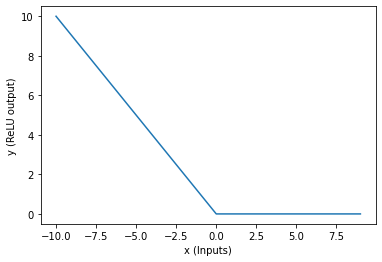

In [10]:
inputs = []
weight = -1
bias = 0

y_results = []
for i in range(-10, 10):
    inputs.append(i)
    y_results.append(ReLU((i * weight) + bias))

print("Inputs:", inputs)
print("Results:", y_results)

plt.plot(inputs, y_results)
plt.xlabel("x (Inputs)")
plt.ylabel("y (ReLU output)")
plt.show()